In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline


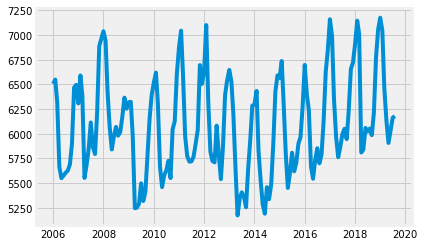

In [ ]:
url = "https://raw.githubusercontent.com/vladsurdea/ML/main/Data/ARIMA.csv"
df= pd.read_csv(url,parse_dates=['Datetime'],index_col=['Datetime'],)
df=df.dropna()
monthly_data = df.resample('MS').mean()
ts=monthly_data["Value"]
plt.plot(ts)

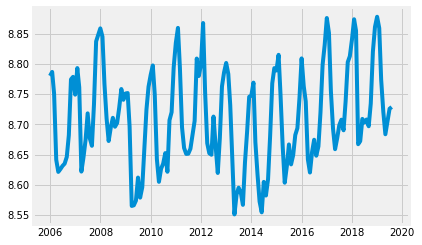

In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log)

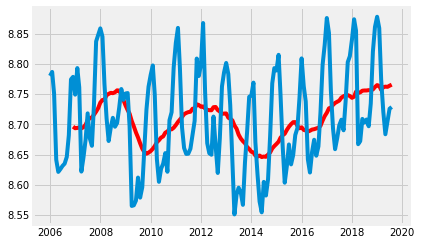

In [ ]:
ts_smooth = ts_log.rolling(window = 12).mean()
plt.plot(ts_smooth, color = 'red')
plt.plot(ts_log)
plt.show()

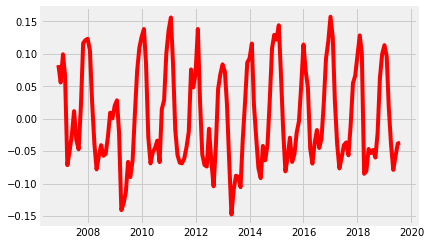

In [ ]:
sub_ts = ts_log - ts_smooth
sub_ts.dropna(inplace = True)
plt.plot(sub_ts,color="red")


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

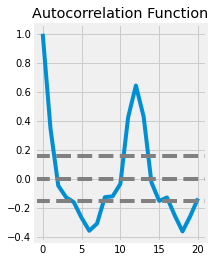

In [ ]:
ts_diff = ts_log - ts_log.shift()
ts_diff.dropna(inplace = True)
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='ols')
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

NameError: ignored

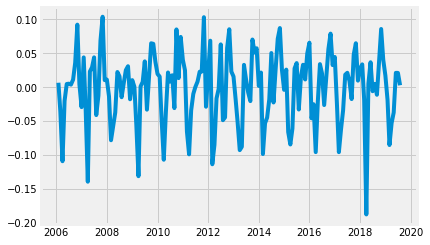

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_ARIMA = model.fit(disp=-1) 
plt.plot(ts_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_diff)**2))

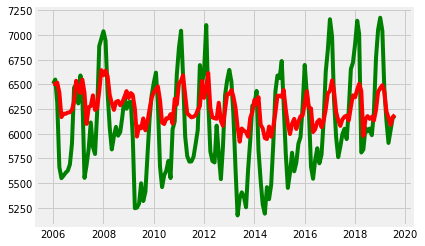

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts, color="green")
plt.plot(predictions_ARIMA, color="red")



In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ts, predictions_ARIMA)
print("MAPE =", mape)

MAPE = 234819.58928023733


In [ ]:
def MBE(y_true, y_pred):
    '''
    Parameters:
        y_true (array): Array of observed values
        y_pred (array): Array of prediction values

    Returns:
        mbe (float): Biais score
    '''
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_true = y_true.reshape(len(y_true),1)
    y_pred = y_pred.reshape(len(y_pred),1)   
    diff = (y_true-y_pred)
    mbe = diff.mean()
    print('MBE = ', mbe)

MBE(ts,predictions_ARIMA)

MBE =  1476.662446906179


In [ ]:
import math
MSE = np.square(np.subtract(ts,predictions_ARIMA)).mean() 
RMSE = math.sqrt(MSE)
print("RMSE =", RMSE)

RMSE = 2818.639579642004
